## Assignment 4, part 1 of 2

1. The list of the various MSc programmes offered by the School of EECS is provided at the following URL: [http://eecs.qmul.ac.uk/postgraduate/programmes/](http://eecs.qmul.ac.uk/postgraduate/programmes/).
Scrape this website to create a DataFrame where each row corresponds to a programme, and contains the following columns:
- "Programme": the name of the programme;
- "URL": the link to the URL that contains information about this programme;
- "Modules": a list of the titles of all modules in the programme (compulsory or elective).

In [ ]:
import pandas as pd
import numpy as np
from urllib.request import urlopen
from bs4 import BeautifulSoup
import time
#!pip install lxml

url = "http://eecs.qmul.ac.uk/postgraduate/programmes/"
data = []
html = urlopen(url)
time.sleep(2)

if html.status:
  headers = html.getheaders()
  html.peek()
  soup1 = BeautifulSoup(html, 'lxml')
  prose_divs = soup1.find_all('div', {"class": "prose"})

  for prose in prose_divs:
    div_url = prose.find_all('a')
    for url in div_url:
      URL = url.get('href')
      Programme = url.text
      Modules = []
      nextpage = urlopen(URL)
      time.sleep(2)
      soup2 = BeautifulSoup(nextpage, 'lxml')
      postgrad = soup2.find_all('h4', {"class": "disclosure-box__title"})
      for module in postgrad:
        Modules.append(module.text)
      data.append([Programme, URL, Modules])

df = pd.DataFrame(data, columns=('Programme', 'URL', 'Module_List'))
df

,Programme,URL,Module_List
0,MSc Artificial Intelligence,https://www.qmul.ac.uk/postgraduate/taught/cou...,"[Ethics, Regulation and Law in Advanced Digita..."
1,MSc Big Data Science,https://www.qmul.ac.uk/postgraduate/taught/cou...,"[Principles of Machine Learning, Neural Networ..."
2,MSc Computer Games,https://www.qmul.ac.uk/postgraduate/taught/cou...,"[Artificial Intelligence in Games, Multi-platf..."
3,MSc Computer Science,https://www.qmul.ac.uk/postgraduate/taught/cou...,"[Functional Programming, Security and Authenti..."
4,MSc Computer Science by Research,https://www.qmul.ac.uk/postgraduate/taught/cou...,"[MSc by Research Project, Digital Media and So..."
5,Computing and Information Systems,https://www.qmul.ac.uk/postgraduate/taught/cou...,[Risk and Decision-Making for Data Science and...
6,MSc Digital and Technology Solutions (Apprenti...,https://www.qmul.ac.uk/postgraduate/taught/cou...,[Risk and Decision-Making for Data Science and...
7,MSc Data Science and Artificial Intelligence,https://www.qmul.ac.uk/postgraduate/taught/cou...,"[Neural Networks and Deep Learning, Risk and D..."
8,MSc Machine Learning for Visual Data Analytics,https://www.qmul.ac.uk/postgraduate/taught/cou...,"[Machine Learning, Introduction to Computer Vi..."
9,MSc Sound and Music Computing,https://www.qmul.ac.uk/postgraduate/taught/cou...,"[Music Perception and Cognition, Project, Fund..."


2. Consider the graph in the figure below as displaying the links for a group of 4 webpages. Write the system of equations that characterize the PageRank vector $\pi$, with teleportation probability $\alpha$.

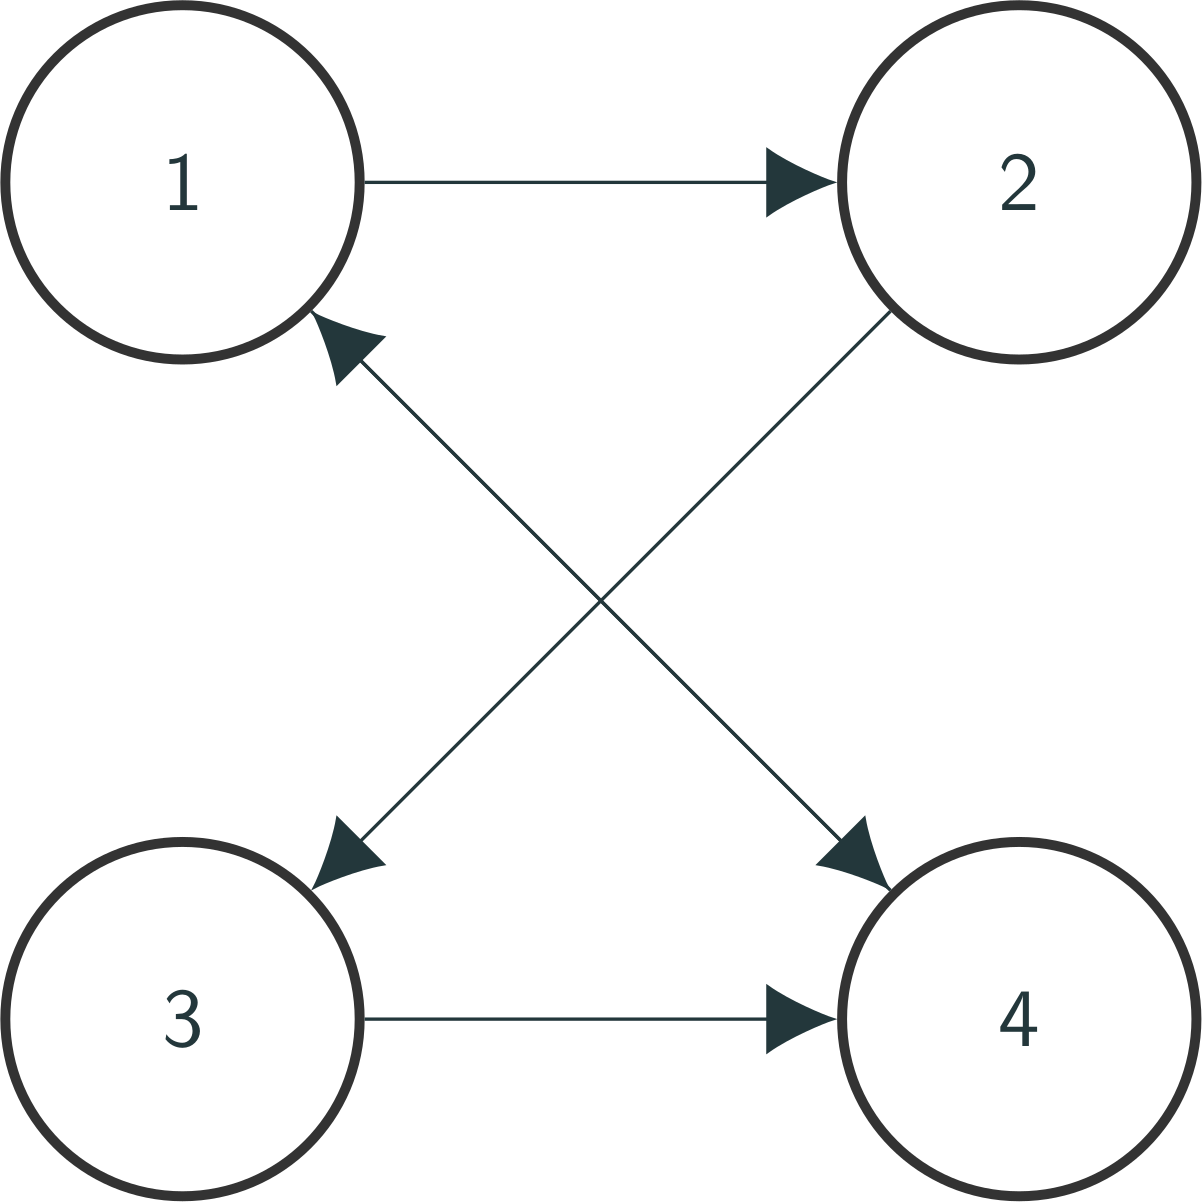

Using equation:

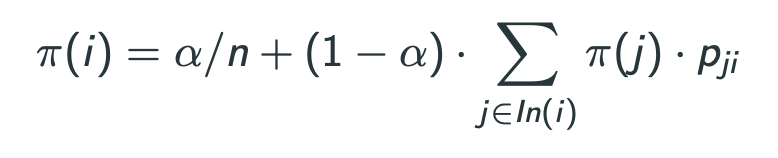

Derivation of PageRank for all nodes:

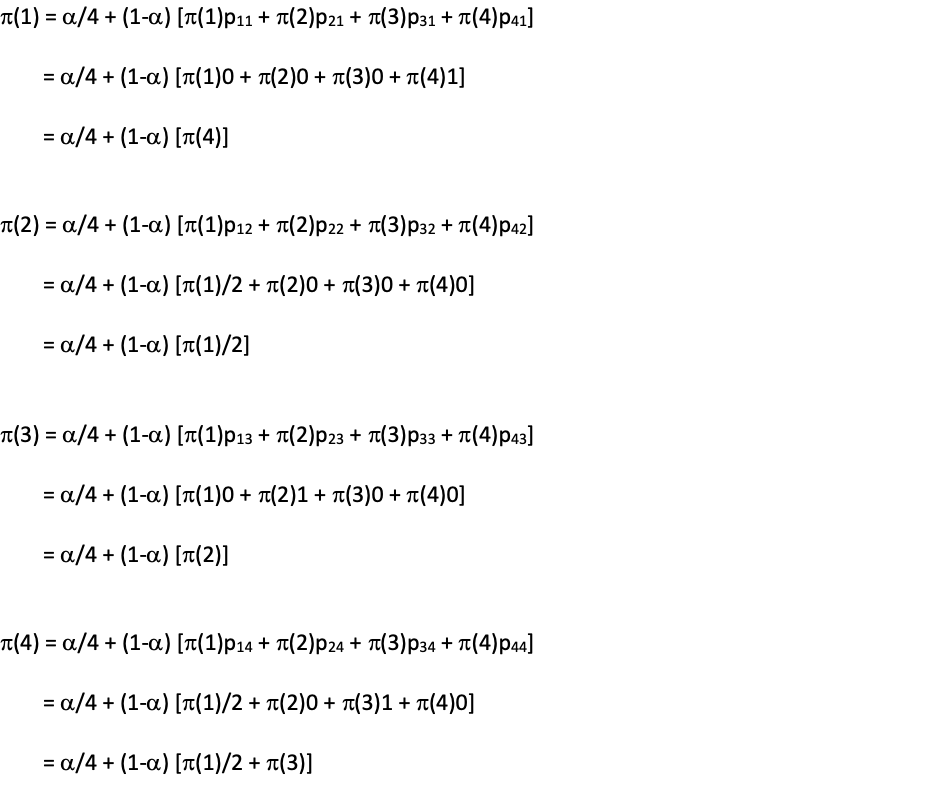

3. Write an implementation of the PageRank algorithm. You must define a function that takes two parameters:
- `A`: numpy array containing the adjacency matrix of the input graph. You may assume there are no dangling nodes;
- `alpha`: the teleportation probability.
Use your implementation to derive the PageRank vector for the graph from the previous exercise, setting $\alpha=0.1$.

In [ ]:
import numpy as np
import math

def normalizeAdjacencyMatrix(A):
    n = len(A)
    for j in range(len(A[0])):
        sumOfColumn = 0
        for i in range(len(A)):
            sumOfColumn += A[i][j]

        if sumOfColumn == 0:
            for val in range(n):
                A[val][j] = 1/n
        else:
            for val in range(n):
                A[val][j] = (A[val][j] / sumOfColumn)
    return A

def dampingMatrix(A, alpha):
    n = len(A)
    dumping_factor = alpha
    Q = [[1/n]*n]*n
    arrA = np.array(A)
    arrQ = np.array(Q)
    arrM = np.add((dumping_factor)*arrA, (1-dumping_factor)*arrQ)
    return arrM

def findSteadyState(M, n):
    evectors = np.linalg.eig(M)[1]
    evalues = np.linalg.eig(M)[0]
    lstEVals = []
    for val in evalues:
        lstEVals.append(np.round(val))

    idxWithEval1 = lstEVals.index(1)
    steadyStateVector = evectors[:, idxWithEval1]

    lstVersionSteadyState = []
    sumOfComponents = 0
    returnVector = []
    for val in steadyStateVector:
        sumOfComponents += val
        lstVersionSteadyState.append(val)
    for val in lstVersionSteadyState:
        returnVector.append(val/sumOfComponents)

    return returnVector

def pageRank(A, alpha):
    n = len(A)
    A = normalizeAdjacencyMatrix(A)
    M = dampingMatrix(A, alpha)

    steadyStateVectorOfA = findSteadyState(M, n)
    return steadyStateVectorOfA


matrix = [ [0, 0, 0, 1],
             [1, 0, 0, 0],
             [0, 1, 0, 0],
             [1, 0, 1, 0] ]

result= pageRank(matrix, 0.1)
print(result)

[(0.2512437810945273-0j), (0.23756218905472634-0j), (0.2487562189054726-0j), (0.2624378109452737-0j)]


## Assignment 4, part 2 of 2


1. Consider the following small corpus:
    * **Document 1**: "Data refers to characteristics that are collected through observation."
    * **Document 2**: "A dataset can be viewed as a collection of objects."
    * **Document 3**: "Data objects are described by a number of attributes."
    * **Document 4**: "An attribute is a characteristic or feature of an object."

Construct and display the document-term matrix for the above documents. Remove all stop words (here consider as stop words: articles, prepositions, conjunctions, pronouns, and common verbs) and punctuation marks; convert any plural nouns/adjectives to their singular form; and convert verbs to the present tense and first person singular form, before you construct the matrix.

Document-Term Matrix:

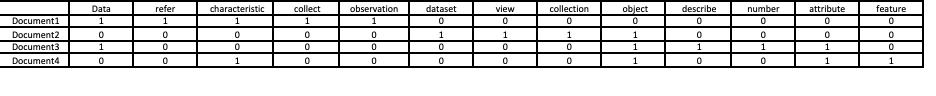

2. Using the above constructed document-term matrix, calculate the inverse document frequency $\mathit{idf}(w)$ for all words $w$ you have identified from question 1(a).

$\mathit{idf}(w)= log(N/df)$, where $N$ is the total number of documents and $df$ is the number of documents where $w$ occurs.

For example,
$\mathit{idf}(Data) = log(4/2) = log(2) = 0.301$

Similarly, the table below shows the $\mathit{idf}(w)$ for all words $w$:

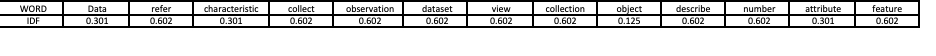

3. **[0.5 marks]** Consider the following timeseries $y = \{0.1, 0.15, 0.2, 0.2, 0.3, 0.4, 0.25, 0.6, 0.5\}$. Perform timeseries binning using $k=3$ values per bin, and show the resulting timeseries after binning.


The binned groups using $k=3$ values per bin are:

$y = \[0.1, 0.15, 0.2]\, \[0.2, 0.3, 0.4]\, \[0.25, 0.6, 0.5]\$

Applying the following equation for assigning the values for binning:

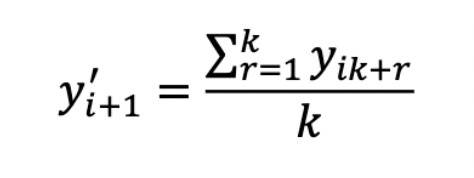

The equation averages the values inside each bin into a single value. Thus the output is:

$y = \[0.15,0.15,0.15]\, \[0.3,0.3,0.3]\, \[0.45,0.45,0.45]\$

$y = \{0.15,0.15,0.15,0.3,0.3,0.3,0.45,0.45,0.45\}$

4. Load CSV file "timeseries.csv", which contains a univariate timeseries. Once loaded, convert the timeseries into a numpy array and use the numpy flatten() function to ensure that the loaded timeseries is one-dimensional. Compute the Discrete Fourier Transform (DFT) of the timeseries, and display plots for both the original timeseries and the magnitude of its DFT. How many predominant frequency components does the timeseries have?

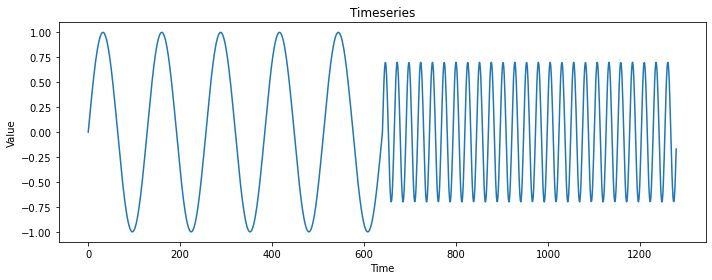

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from pandas import read_csv

series = read_csv('timeseries.csv', header=None).to_numpy()
series = series.flatten()

plt.figure(figsize=(10, 4))
plt.title('Timeseries')
plt.plot(series)
plt.xlabel('Time')
plt.ylabel('Value')
plt.tight_layout()

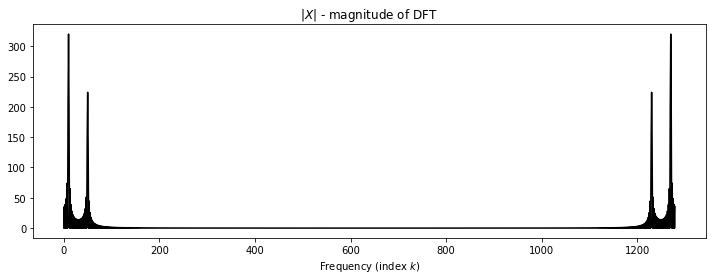

In [ ]:
Xfft = np.fft.fft(series)

plt.figure(figsize=(10, 4))
plt.title('$|X|$ - magnitude of DFT')
plt.plot(np.abs(Xfft), 'k')
plt.xlabel('Frequency (index $k$)')
plt.tight_layout()

The number of predominant frequency components the timeseries has are 2.

5. Using the daily births dataset from this lab tutorial, smooth the timeseries using trailing moving average smoothing and a window size that corresponds to one week; then replace any NaN values with zeros. Perform timeseries forecasting using the smoothed dataset in order to predict daily births for the first 5 days of 1960, using the models below. Show your forecasting results.

*   AR model with $p=2$
*   ARMA model with $p=2$ and $q=2$



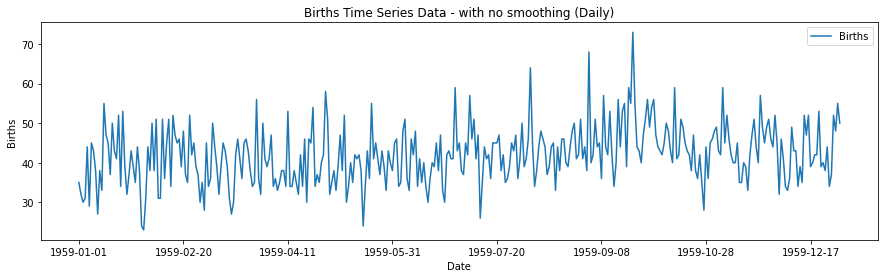

Before NaN removal:
               Births
Date                 
1959-01-01        NaN
1959-01-02        NaN
1959-01-03        NaN
1959-01-04        NaN
1959-01-05        NaN
1959-01-06        NaN
1959-01-07  35.142857
1959-01-08  36.285714
1959-01-09  37.142857
1959-01-10  36.714286
After NaN removal:
               Births
Date                 
1959-01-01   0.000000
1959-01-02   0.000000
1959-01-03   0.000000
1959-01-04   0.000000
1959-01-05   0.000000
1959-01-06   0.000000
1959-01-07  35.142857
1959-01-08  36.285714
1959-01-09  37.142857
1959-01-10  36.714286


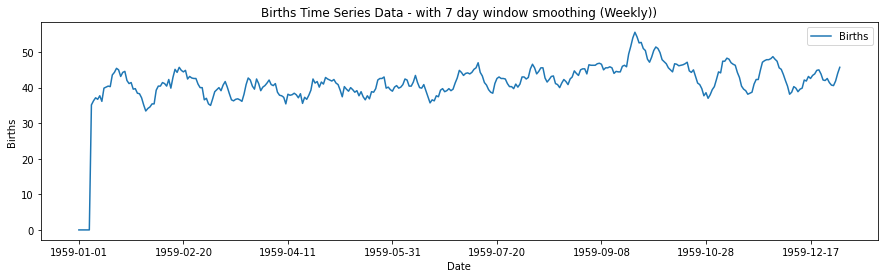

In [ ]:
from pandas import read_csv
import matplotlib.pyplot as plt

series = read_csv('births.csv', header=0, index_col=0)
series.plot(figsize=(15,4))
plt.xlabel('Date')
plt.ylabel('Births')
plt.title('Births Time Series Data - with no smoothing (Daily)')
plt.show()


rolling = series.rolling(window=7) # using a window of weekly samples

rolling_mean = rolling.mean()
print('Before NaN removal:')
print(rolling_mean.head(10))


rolling_mean = rolling.mean().fillna(0)
print('After NaN removal:')
print(rolling_mean.head(10))


rolling_mean.plot(figsize=(15,4))
plt.xlabel('Date')
plt.ylabel('Births')
plt.title('Births Time Series Data - with 7 day window smoothing (Weekly))')
plt.show()

In [ ]:
pip install AutoReg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(rolling_mean, lags=2, old_names=False)
model_fit = model.fit()

yhat = model_fit.predict(len(rolling_mean), len(rolling_mean)+4)
print(yhat)

1960-01-01    45.380177
1960-01-02    44.960852
1960-01-03    44.590676
1960-01-04    44.271699
1960-01-05    43.997395
Freq: D, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from random import random

model = ARIMA(rolling_mean, order=(2, 0, 2))
model_fit = model.fit()

yhat = model_fit.predict(len(rolling_mean), len(rolling_mean)+4)
print(yhat)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


1960-01-01    45.810250
1960-01-02    45.818771
1960-01-03    45.728098
1960-01-04    45.564024
1960-01-05    45.347314
Freq: D, Name: predicted_mean, dtype: float64


6. Using a similar process used in section 1 of this lab notebook, perform document clustering using k-means on the following wikipedia articles: anomaly detection, cluster analysis, k-means clustering, data mining, data warehouse, association rule learning. As with section 1, use the elbow metric to find an appropriate number of clusters. Discuss and display the document clustering results.

In [ ]:
pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=f0d11013726154d707fab436d8c35f98dbd5d61e7f24a98b36d7014139563ceb
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [ ]:
import pandas as pd
import wikipedia

articles = ['anomaly detection', 'cluster analysis', 'k-means clustering','data warehouse', 'association rule learning', 'datamining']

wiki_lst=[]
title=[]

for article in articles:
    print("loading content: ",article)
    wiki_lst.append(wikipedia.page(article).content)
    title.append(article)

loading content:  anomaly detection
loading content:  cluster analysis
loading content:  k-means clustering
loading content:  data warehouse
loading content:  association rule learning
loading content:  datamining


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(wiki_lst)

print(X.shape)

(6, 3533)


K-means experiments are done in the range of 1 to 7, where 7 is the number of documents this dataset has. Elbow method is used here, and it is decided there is a kink around 4.

[1.6461058881413067, 1.1001426110831147, 0.6641220378349306, 0.36420895765385897, 0.16328812081971122, 7.105427357601002e-15]


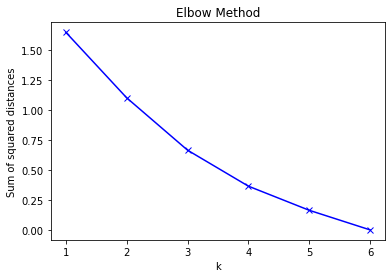

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,7)

for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

print(Sum_of_squared_distances)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()

This section runs the clustering algorithm for k = 4 and displays the result.

In [ ]:
true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)

labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                       title  cluster
1           cluster analysis        0
2         k-means clustering        0
3             data warehouse        1
5                 datamining        1
4  association rule learning        2
0          anomaly detection        3
